In [1]:
# import library
import pandas as pd
import numpy as np
import re
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn import model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import Input,Dense,concatenate,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanAbsoluteError,MeanSquaredError,Accuracy,Precision,Recall

In [2]:
# Path File
path="C:\\Users\\Hasan Zein\\ESSAI OLS\\preprocessed_data.xlsx"

In [3]:
# Open file
data = pd.read_excel(path)

In [4]:
# Check file
data

,userName,score,at,content,Label,hasil,tokenize_hasil,STOP_REMOVAL,clean
0,Achmad Faisal,1,2022-08-14 12:09:13,Sudah vaksin tapi sertifikat belom keluar suda...,0,sudah vaksin tapi sertifikat belom keluar suda...,"['sudah', 'vaksin', 'tapi', 'sertifikat', 'bel...","['vaksin', 'sertifikat', 'belom', 'komplen', '...",vaksin sertifikat bom komplen mana gak tanggap...
1,Stineke Mare,2,2022-08-14 11:26:51,Min kok ngak bisa ke buka sertifika nya,0,min kok ngak bisa ke buka sertifika nya,"['min', 'kok', 'ngak', 'bisa', 'ke', 'buka', '...","['min', 'ngak', 'buka', 'sertifika', 'nya']",min ngak buka sertifika nya
2,AHMAD YANI,2,2022-08-14 10:35:37,Terlalu rumit sungguh kecewa Udah di masukin d...,0,terlalu rumit sungguh kecewa udah di masukin d...,"['terlalu', 'rumit', 'sungguh', 'kecewa', 'uda...","['rumit', 'sungguh', 'kecewa', 'udah', 'masuki...",rumit sungguh kecewa udah masukin data lengkap...
3,Hendrik Timisela,5,2022-08-14 10:34:40,Aplikasi ini sangat bermanfaat.....,1,aplikasi ini sangat bermanfaat,"['aplikasi', 'ini', 'sangat', 'bermanfaat']","['aplikasi', 'bermanfaat']",aplikasi manfaat
4,Heni Susanti,5,2022-08-14 10:21:21,Ok bgt,1,ok bgt,"['ok', 'bgt']","['ok', 'bgt']",ok bgt
...,...,...,...,...,...,...,...,...,...
2270,Sarah Oasis,1,2022-07-26 14:09:16,susah dan sangat sangat sangat merepotkan. mau...,0,susah dan sangat sangat sangat merepotkan mau ...,"['susah', 'dan', 'sangat', 'sangat', 'sangat',...","['susah', 'merepotkan', 'buka', 'sertifikat', ...",susah repot buka sertifikat aja bolak ga
2271,Edy sudrajat,5,2022-07-26 14:02:47,Jos,1,jos,['jos'],['jos'],jos
2272,diah agus tiyani,1,2022-07-26 14:00:07,Sudah vaksin ke 3 tp di app tidak mincul serti...,0,sudah vaksin ke tp di app tidak mincul sertiv...,"['sudah', 'vaksin', 'ke', 'tp', 'di', 'app', '...","['vaksin', 'tp', 'app', 'mincul', 'sertivikatn...",vaksin tp app mincul sertivikatnya ga input da...
2273,Oscar Imanuel,5,2022-07-26 13:57:11,Apknya bagus bangettt,1,apknya bagus bangettt,"['apknya', 'bagus', 'bangettt']","['apknya', 'bagus', 'bangettt']",apknya bagus bangettt


In [5]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   userName        2275 non-null   object        
 1   score           2275 non-null   int64         
 2   at              2275 non-null   datetime64[ns]
 3   content         2275 non-null   object        
 4   Label           2275 non-null   int64         
 5   hasil           2274 non-null   object        
 6   tokenize_hasil  2275 non-null   object        
 7   STOP_REMOVAL    2275 non-null   object        
 8   clean           2198 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 160.1+ KB


# EDA

## Barplot label

<AxesSubplot:title={'center':'Barplot Label'}>

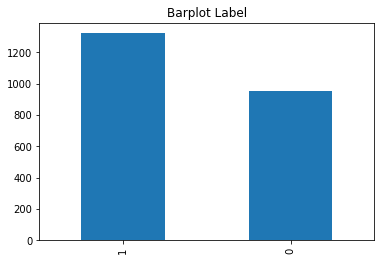

In [6]:
# Plot data label status
data["Label"].value_counts().plot(kind='bar',title="Barplot Label")

In [7]:
data["Label"].value_counts()

1    1321
0     954
Name: Label, dtype: int64

## Most frequent Word

In [8]:
# Find most frequent Word
dt=data["clean"].dropna()
p = Counter(" ".join(dt).split()).most_common(5)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

         Word  Frequency
0      vaksin        453
1    aplikasi        354
2       bagus        278
3  sertifikat        267
4          ok        180


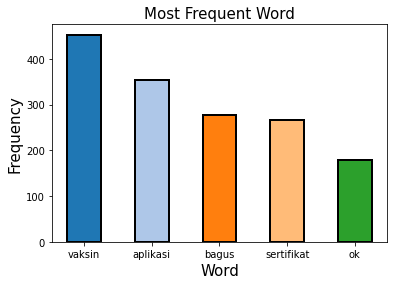

In [9]:
# Make most frequent Word barplot
col_map = plt.get_cmap('tab20')
plt.bar(rslt.Word, rslt.Frequency, width=0.5, color=col_map.colors, 
        edgecolor='black', linewidth=2)

plt.title('Most Frequent Word', fontsize=15)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Preprocessing

## Change Format Data

In [10]:
# Change Format Data
data=data.astype({"clean": "string"})
data=data.astype({"Label": "category"})

## TF-IDF

In [11]:
# TF-IDF
tf=TfidfVectorizer()
text_tf=tf.fit_transform(data["clean"].astype("U"))
text_tf

<2275x2134 sparse matrix of type '<class 'numpy.float64'>'
	with 10385 stored elements in Compressed Sparse Row format>

## Splitting data

In [12]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(text_tf,data["Label"],test_size=0.2,random_state=99)

# Modelling

## Multinomial Naive Bayes

In [13]:
# Built the model
model1=MultinomialNB().fit(X_train, y_train)

In [14]:
# Get Parameter Model
model1.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [15]:
# Predict the model
predicted=model1.predict(X_test)

In [16]:
# check value
predicted

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [17]:
# Check Classification report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       189
           1       0.96      0.96      0.96       266

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



## Random Forest

In [18]:
# Built the model
model2=RandomForestClassifier().fit(X_train, y_train)

In [19]:
# Get Parameter Model
model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Predict the model
predicted2=model2.predict(X_test)

In [21]:
# check value
predicted2

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [22]:
# Check Classification report
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       189
           1       0.97      0.85      0.91       266

    accuracy                           0.90       455
   macro avg       0.89      0.91      0.90       455
weighted avg       0.91      0.90      0.90       455



## SVM

In [23]:
# Built the model
model3=svm.SVC(kernel="linear").fit(X_train, y_train)

In [24]:
# Get Parameter Model
model1.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [25]:
# Predict the model
predicted3=model3.predict(X_test)

In [26]:
# check value
predicted3

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [27]:
# Check Classification report
print(classification_report(y_test,predicted3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       189
           1       0.95      0.95      0.95       266

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



## MLP

In [28]:
# Check shape
X_train.shape

(1820, 2134)

In [29]:
#Model MLP Klasifikasi Biner
inputs=Input(shape=X_train.shape[1:])
layers=Dense(25,activation='relu')(inputs)
layers=Dense(25,activation='relu')(layers)
output=Dense(1,activation='sigmoid')(layers)
model4=Model(inputs=[inputs],outputs=[output])
model4.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=1e-2), 
              metrics=["accuracy",Precision(),Recall()])

In [30]:
# Model summary
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2134)]            0         
                                                                 
 dense (Dense)               (None, 25)                53375     
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 54,051
Trainable params: 54,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Convert CSR to array
X_trainc=X_train.toarray()
X_testc=X_test.toarray()

In [32]:
# Train the model
history2=model4.fit(X_trainc,y_train,epochs=100,validation_data=(X_testc,y_test))

Epoch 1/100
57/57 [==============================] - 1s 8ms/step - loss: 0.6909 - accuracy: 0.5643 - precision: 0.5781 - recall: 0.9194 - val_loss: 0.6871 - val_accuracy: 0.5846 - val_precision: 0.5846 - val_recall: 1.0000
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5797 - precision: 0.5797 - recall: 1.0000 - val_loss: 0.6818 - val_accuracy: 0.5846 - val_precision: 0.5846 - val_recall: 1.0000
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5797 - precision: 0.5797 - recall: 1.0000 - val_loss: 0.6780 - val_accuracy: 0.5846 - val_precision: 0.5846 - val_recall: 1.0000
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5797 - precision: 0.5797 - recall: 1.0000 - val_loss: 0.6750 - val_accuracy: 0.5846 - val_precision: 0.5846 - val_recall: 1.0000
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5797 - precisi

In [33]:
# Evaluate the model
test2_eval=model4.evaluate(X_testc, y_test)
for name, value in zip(model4.metrics_names, test2_eval):
  print(name, ': ', value)
print()

15/15 [==============================] - 0s 928us/step - loss: 0.1717 - accuracy: 0.9604 - precision: 0.9697 - recall: 0.9624
loss :  0.17174914479255676
accuracy :  0.9604395627975464
precision :  0.9696969985961914
recall :  0.9624060392379761



In [34]:
# Predict the model
Y_predc=model4.predict(X_testc)

In [35]:
# Convert into binary
y_predc=np.zeros(Y_predc.shape)
y_predc[Y_predc>0.5]=1
y_predc=np.array(y_predc)

In [36]:
# Classification Report MLP
print(classification_report(y_test,y_predc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       189
           1       0.97      0.96      0.97       266

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



# Model Terbaik

In [37]:
#save model
model4.save("MLP Classifier.h5")